# Clustering con K-Means

Notebook para ejecutar un flujo sencillo de clustering K-Means sobre `data_final.csv`.
Incluye: carga, selección de features, escalado, búsqueda de k (elbow + silhouette), visualización con PCA y guardado de etiquetas y modelo.

In [1]:
# Imports
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import joblib





In [2]:
%load_ext kedro.ipython

[11/24/25 15:10:12] INFO     Using                                                                  ]8;id=528214;file://c:\Users\droid\Desktop\Rainbow_six_kedro\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\framework\project\__init__.py\__init__.py]8;;\:]8;id=127159;file://c:\Users\droid\Desktop\Rainbow_six_kedro\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\framework\project\__init__.py#270\270]8;;\
                             'c:\Users\droid\Desktop\Rainbow_six_kedro\Rainbow_six_kedro_ml\venv\Li                
                             b\site-packages\kedro\framework\project\rich_logging.yml' as logging                  
                             configuration.                                                                        

[11/24/25 15:10:13] INFO     Registered line magic '%reload_kedro'                                   ]8;id=393781;file://c:\Users\droid\Desktop\Rainbow_six_kedro\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=397415;file://c:\Users\droid\Desktop\Rainbow_six_kedro\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\ipython\__init__.py#63\63]8;;\

                    INFO     Registered line magic '%load_node'                                      ]8;id=44079;file://c:\Users\droid\Desktop\Rainbow_six_kedro\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=253511;file://c:\Users\droid\Desktop\Rainbow_six_kedro\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\ipython\__init__.py#65\65]8;;\

                    INFO     Resolved project path as:                                              ]8;id=896132;file://c:\Users\droid\Desktop\Rainbow_six_kedro\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=995757;file://c:\Users\droid\Desktop\Rainbow_six_kedro\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\ipython\__init__.py#180\180]8;;\
                             c:\Users\droid\Desktop\Rainbow_six_kedro\Rainbow_six_kedro_ml\proyecto                
                             -ml.                                                                                  
                             To set a different path, run '%reload_kedro <project_root>'                           

[11/24/25 15:10:17] INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=505699;file://c:\Users\droid\Desktop\Rainbow_six_kedro\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro_telemetry\plugin.py\plugin.py]8;;\:]8;id=852460;file://c:\Users\droid\Desktop\Rainbow_six_kedro\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro_telemetry\plugin.py#243\243]8;;\
                             the product. No personal data or IP addresses are stored on our side. To              
                             opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK` environment              
                             variables, or create a `.telemetry` file in the current working                       
                             directory with the contents `consent: false`. To hide this message,                   
                             explicitly grant or deny consent. Read more at                                        
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[11/24/25 15:10:18] INFO     Kedro project proteyecto-ml                                            ]8;id=825769;file://c:\Users\droid\Desktop\Rainbow_six_kedro\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=558032;file://c:\Users\droid\Desktop\Rainbow_six_kedro\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\ipython\__init__.py#146\146]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=318534;file://c:\Users\droid\Desktop\Rainbow_six_kedro\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=272722;file://c:\Users\droid\Desktop\Rainbow_six_kedro\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\ipython\__init__.py#147\147]8;;\
                             'pipelines'                                                                           

[11/24/25 15:10:20] INFO     Registered line magic 'run_viz'                                        ]8;id=346821;file://c:\Users\droid\Desktop\Rainbow_six_kedro\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=147181;file://c:\Users\droid\Desktop\Rainbow_six_kedro\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\ipython\__init__.py#153\153]8;;\

In [3]:
df = catalog.load("data_final")

[11/24/25 15:10:25] INFO     Loading data from data_final (CSVDataset)...                      ]8;id=210239;file://c:\Users\droid\Desktop\Rainbow_six_kedro\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=364511;file://c:\Users\droid\Desktop\Rainbow_six_kedro\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

In [4]:


# ------------------------------
# 0. Limitar a 500 datos
# ------------------------------
df_limited = df.head(1000).copy()

# ------------------------------
# 1. Selección de columnas
# ------------------------------
X_raw = df_limited[['mapname', 'operator', 'primaryweapon']]

# ------------------------------
# 2. ONE-HOT ENCODING
# ------------------------------
encoder = OneHotEncoder(sparse_output=False)
X_encoded = encoder.fit_transform(X_raw)

# ------------------------------
# 3. STANDARD SCALER (IMPORTANTE!)
# ------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# ------------------------------
# 4. PCA (Reducción de Dimensión)
# ------------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Varianza explicada por PCA:", pca.explained_variance_ratio_)

# ------------------------------
# 5. K-MEANS sobre datos reducidos
# ------------------------------
kmeans = KMeans(n_clusters=5, random_state=0)
labels = kmeans.fit_predict(X_pca)

df_limited["cluster"] = labels

# ------------------------------
# 6. Silhouette Score para evaluar
# ------------------------------
sil = silhouette_score(X_pca, labels)
print("Silhouette con PCA:", sil)



Varianza explicada por PCA: [0.05499186 0.05033484]
Silhouette con PCA: 0.7969428426254631


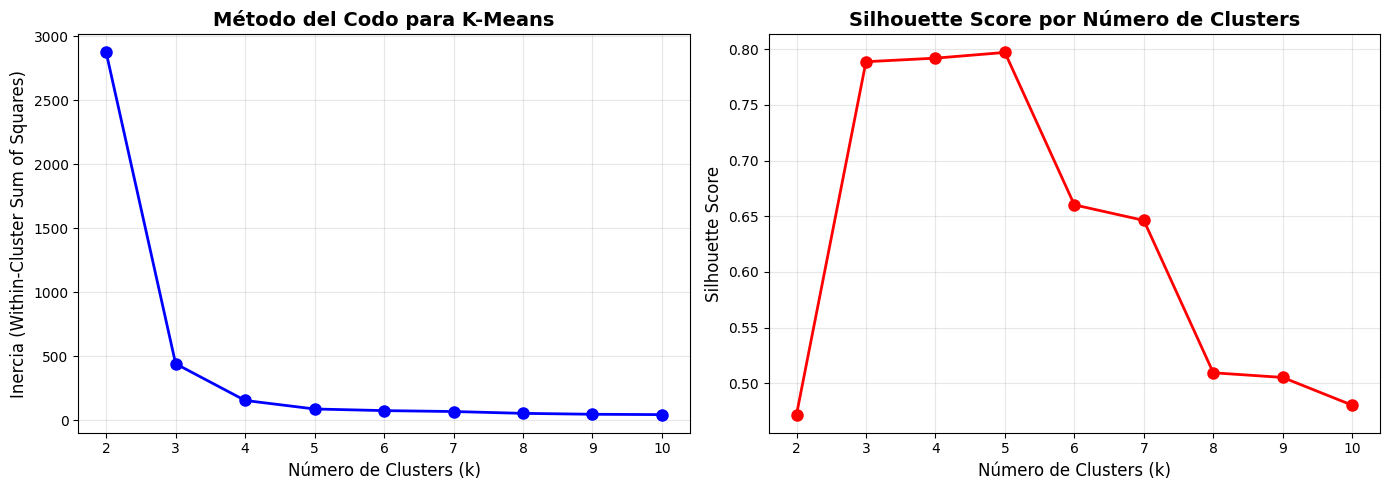


RESUMEN DE MÉTRICAS POR NÚMERO DE CLUSTERS
K     Inercia              Silhouette Score    
------------------------------------------------------------
2     2874.61              0.4721              
3     442.49               0.7886              
4     155.95               0.7918              
5     89.30                0.7969              
6     76.54                0.6602              
7     69.39                0.6463              
8     55.13                0.5096              
9     47.96                0.5054              
10    45.28                0.4805              

✓ K óptimo según Silhouette Score: 5
  Silhouette Score máximo: 0.7969


In [5]:
# ------------------------------
# DETERMINAR NÚMERO ÓPTIMO DE CLUSTERS
# ------------------------------

# Rango de clusters a probar
k_range = range(2, 11)
inertias = []
silhouette_scores = []

# Calcular métricas para cada k
for k in k_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=0)
    labels_temp = kmeans_temp.fit_predict(X_pca)
    inertias.append(kmeans_temp.inertia_)
    silhouette_scores.append(silhouette_score(X_pca, labels_temp))

# Crear subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico 1: Método del Codo (Elbow Method)
ax1.plot(k_range, inertias, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Número de Clusters (k)', fontsize=12)
ax1.set_ylabel('Inercia (Within-Cluster Sum of Squares)', fontsize=12)
ax1.set_title('Método del Codo para K-Means', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.set_xticks(k_range)

# Gráfico 2: Silhouette Score
ax2.plot(k_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
ax2.set_xlabel('Número de Clusters (k)', fontsize=12)
ax2.set_ylabel('Silhouette Score', fontsize=12)
ax2.set_title('Silhouette Score por Número de Clusters', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.set_xticks(k_range)

plt.tight_layout()
plt.show()

# Mostrar resultados en tabla
print("\n" + "="*60)
print("RESUMEN DE MÉTRICAS POR NÚMERO DE CLUSTERS")
print("="*60)
print(f"{'K':<5} {'Inercia':<20} {'Silhouette Score':<20}")
print("-"*60)
for k, inertia, sil in zip(k_range, inertias, silhouette_scores):
    print(f"{k:<5} {inertia:<20.2f} {sil:<20.4f}")
print("="*60)

# Identificar el k óptimo basado en Silhouette Score
optimal_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print(f"\n✓ K óptimo según Silhouette Score: {optimal_k}")
print(f"  Silhouette Score máximo: {max(silhouette_scores):.4f}")


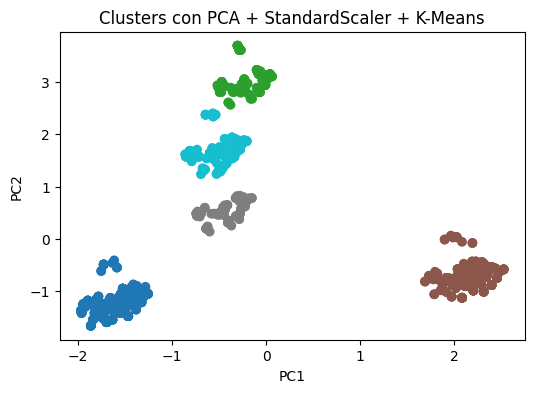

In [ ]:
# 7. GRAFICO PCA + CLUSTERS

plt.figure(figsize=(6,4))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap="tab10")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Clusters con PCA + StandardScaler + K-Means")
plt.show()


In [7]:
# Ver distribución de operadores por cluster
print(df_limited.groupby("cluster")["operator"].value_counts(normalize=True))

# Ver mapas más frecuentes por cluster
print(df_limited.groupby("cluster")["mapname"].value_counts(normalize=True))

# Ver armas más frecuentes por cluster
print(df_limited.groupby("cluster")["primaryweapon"].value_counts(normalize=True))


cluster  operator
0        2           0.686047
         3           0.313953
1        5           1.000000
2        1           1.000000
3        4           1.000000
4        0           0.960938
         4           0.039062
Name: proportion, dtype: float64
cluster  mapname
0        3          0.098837
         6          0.090116
         14         0.087209
         13         0.078488
         5          0.072674
                      ...   
4        6          0.039062
         11         0.039062
         2          0.031250
         7          0.031250
         10         0.031250
Name: proportion, Length: 79, dtype: float64
cluster  primaryweapon
0        12               0.488372
         17               0.258721
         14               0.125000
         6                0.075581
         9                0.052326
1        20               0.306452
         23               0.282258
         13               0.258065
         2                0.153226
2        15         